[*********************100%***********************]  1 of 1 completed


Potential Future Exposure (PFE) for NVDA at 95.0% confidence level: $1,340,650.76


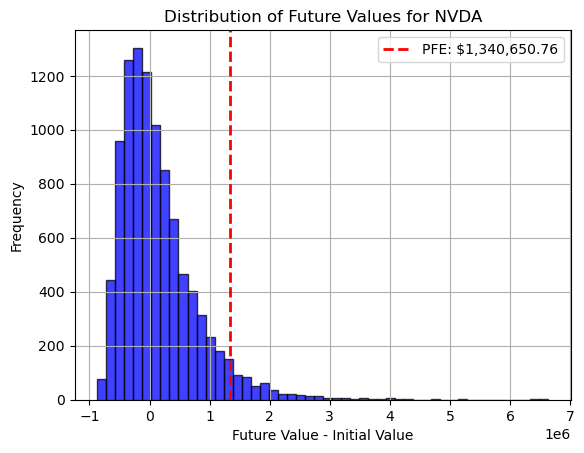

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Parameters
stock_ticker = 'NVDA'  # Ticker symbol for the stock
num_simulations = 10000  # Number of Monte Carlo simulations
time_horizon = 1  # Time horizon in years
confidence_level = 0.95  # Confidence level for PFE
initial_value = 1000000  # Initial value of the derivative

# Fetch historical data for the stock
data = yf.download(stock_ticker, start='2019-01-01', end='2024-01-01')
data['Returns'] = data['Adj Close'].pct_change().dropna()

# Calculate volatility from historical returns
volatility = data['Returns'].std() * np.sqrt(252)  # Annualized volatility (assuming 252 trading days)

# Simulate the future value of the derivative using geometric Brownian motion
np.random.seed(42)  # For reproducibility
returns = np.random.normal(loc=0, scale=volatility * np.sqrt(time_horizon), size=num_simulations)
future_values = initial_value * np.exp(returns)

# Calculate the Potential Future Exposure (PFE)
pfe = np.percentile(future_values - initial_value, confidence_level * 100)

# Print the PFE result
print(f"Potential Future Exposure (PFE) for {stock_ticker} at {confidence_level * 100}% confidence level: ${pfe:,.2f}")

# Plot the distribution of future values
plt.hist(future_values - initial_value, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(x=pfe, color='red', linestyle='dashed', linewidth=2, label=f'PFE: ${pfe:,.2f}')
plt.title(f'Distribution of Future Values for {stock_ticker}')
plt.xlabel('Future Value - Initial Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()
